In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

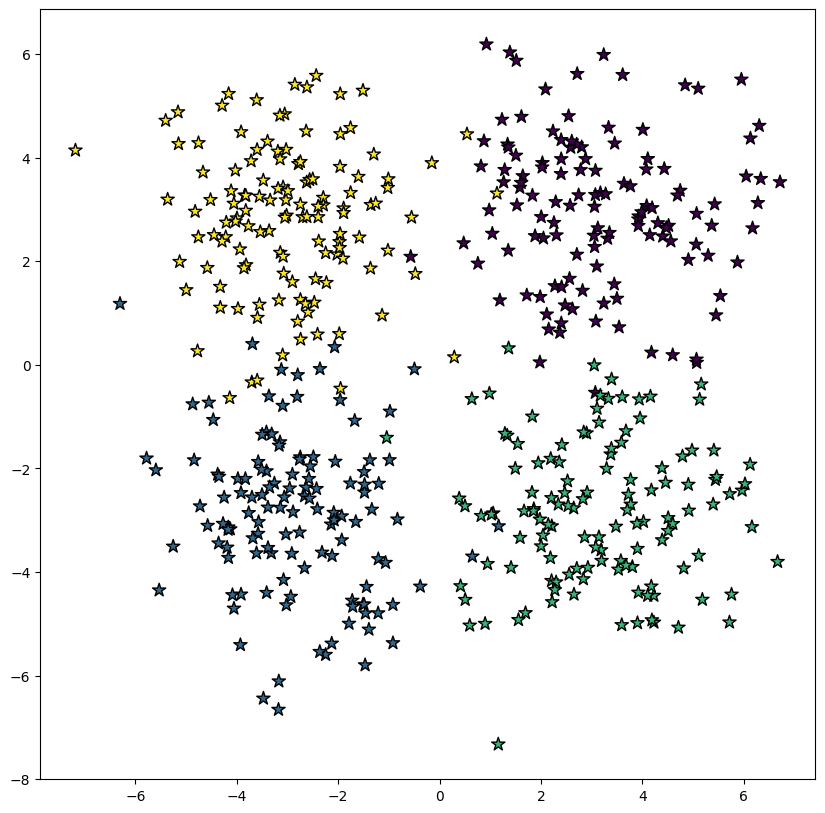

In [136]:
def generate_synthetic_data(n_samples, n_features, centers, cluster_std, random_state):
    np.random.seed(random_state)
    X = []
    y = []
    for center in centers:

        X_center = np.random.normal(loc=center, scale=cluster_std, size=(n_samples // len(centers), n_features))
        y_center = np.full((n_samples // len(centers),), fill_value=centers.index(center))
        X.append(X_center)
        y.append(y_center)
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

n_samples = 500
n_features = 2
centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]
cluster_std = 1.5
random_state = 4

X, y = generate_synthetic_data(n_samples, n_features, centers, cluster_std, random_state)

plt.style.use('default')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()


In [137]:
def split_data(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    num_test_samples = int(len(X) * test_size)
    
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=0)

In [138]:
class KNNClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            pred_label = max(set(nearest_labels), key=nearest_labels.count)
            y_pred.append(pred_label)
        return y_pred
    
knn1 = KNNClassifier(n_neighbors=1)
knn7 = KNNClassifier(n_neighbors=7)
knn15 = KNNClassifier(n_neighbors=15)

In [139]:
knn1.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn15.fit(X_train, y_train)

In [140]:
y_pred_1 = knn1.predict(X_test)
y_pred_7 = knn7.predict(X_test)
y_pred_15 = knn15.predict(X_test)

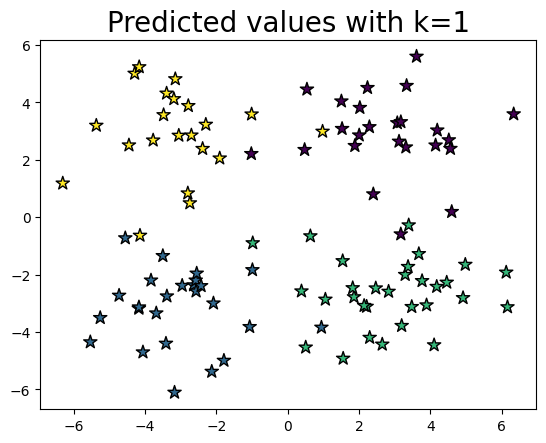

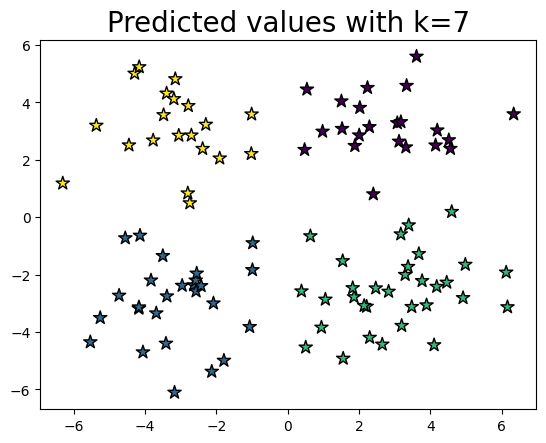

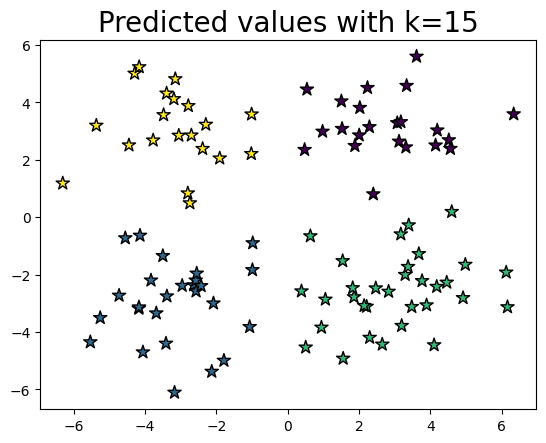

In [141]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()


plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_7, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=7", fontsize=20)
plt.show()


plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_15, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=15", fontsize=20)
plt.show()



In [142]:
def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be equal")
    
    num_correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    
    accuracy = num_correct / len(y_true)
    
    return accuracy

acc_1 = accuracy_score(y_test, y_pred_1) * 100
acc_7 = accuracy_score(y_test, y_pred_7) * 100
acc_15 = accuracy_score(y_test, y_pred_15) * 100


print("Accuracy with k=1", acc_1)
print("Accuracy with k=7", acc_7)
print("Accuracy with k=15", acc_15)

Accuracy with k=1 92.0
Accuracy with k=7 95.0
Accuracy with k=15 95.0
